# Data Visualization

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import plotly.plotly as py
from preprocess_functions import load_data_relevant_cols
import seaborn as sns

In [3]:
raw = load_data_relevant_cols()

/Users/yakubakhmerov/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning:

Columns (4,6,8,10,11,12,17,18,24,29,31,33,35,37,38,39,41,43,45,46,47,49,51,53,54,55,57,58,59,60,61,62,63,64,73,76,79,82,84,86,88,90,92,94,96,97,106,108,114,115,121,123,125,126,127,128,129,134) have mixed types. Specify dtype option on import or set low_memory=False.

/Users/yakubakhmerov/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning:

Columns (6,61,62,63,79,94,96,114,115) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
raw.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,...,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ransom,ransomamt
0,1970.0,7.0,2.0,58.0,Dominican Republic,2.0,Central America & Caribbean,NaN,Santo Domingo,18.456792,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1970.0,0.0,0.0,130.0,Mexico,1.0,North America,NaN,Mexico city,19.432608,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,800000.0
2,1970.0,1.0,0.0,160.0,Philippines,5.0,Southeast Asia,Tarlac,Unknown,15.478598,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,1970.0,1.0,0.0,78.0,Greece,8.0,Western Europe,Attica,Athens,37.983773,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
4,1970.0,1.0,0.0,101.0,Japan,4.0,East Asia,NaN,Fukouka,33.580412,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN


In [5]:
attack_types = raw['attacktype1_txt'].unique()
for i in attack_types:
    print(i)

Assassination
Hostage Taking (Kidnapping)
Bombing/Explosion
Facility/Infrastructure Attack
Armed Assault
Hijacking
Unknown
Unarmed Assault
Hostage Taking (Barricade Incident)


In [9]:
raw.iyear = raw.iyear.astype('int')
raw
data = raw.groupby(['iyear', 'attacktype1_txt']).count()[['imonth']]
data = data.rename(columns=dict(imonth='count'))
data.head()
# data_single =
# data_single
# df = pd.DataFrame(data_single)
# df
# usdata_noUn = usdata[usdata['city'] != 'Unknown'] #see how many people died.
# #per capita computation
# #group by city then j
# usdata_att = usdata_noUn.groupby(['city']).count()[['iyear']]
# usdata_att = usdata_att.rename(columns=dict(iyear='count'))

#average lonigi and lat
#hhack hexbin: average the data and make it have that one point so hexbin knows to make it more colorful.
#usdata_att
a

,count
iyear,
1970,333
1971,238
1972,188
1973,149
1974,284
1975,370
1976,419
1977,635
1978,644


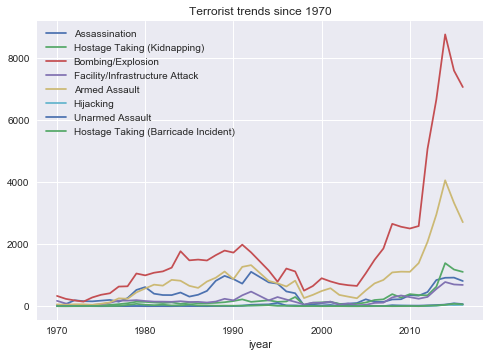

In [49]:
a= "Assassination"
b="Hostage Taking (Kidnapping)"
c="Bombing/Explosion"
d="Facility/Infrastructure Attack"
e="Armed Assault"
f="Hijacking"
g="Unarmed Assault"
h="Hostage Taking (Barricade Incident)"
attack_vec = (a,b,c,d,e,f,g,h)
a= data.xs('Bombing/Explosion', level=1)
for i in attack_vec:
    a=data.xs(i, level=1);
    a['count'].plot(label=i);
    #plt.plot(a.index, a['count'], marker = 'o', mfc='r')
plt.legend();
plt.title('Terrorist trends since 1970');
# a.count

Much of the data is pretty constant throughout time. However, bombing/explosion and armed assault have seen massive spikes.

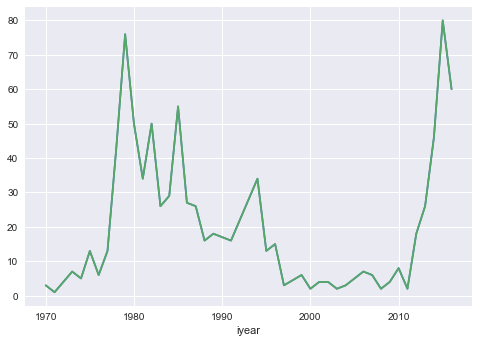

In [19]:
a['count'].plot();
a['count'].plot()

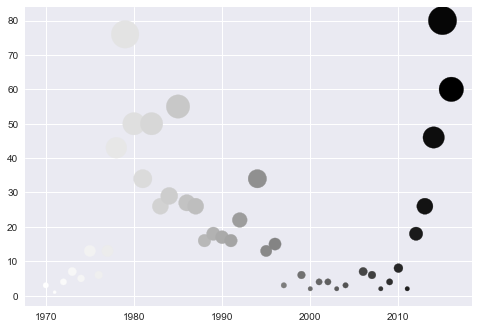

In [47]:
plt.scatter(data=a, x=a.index, y = 'count', c = a.index, s=(10*a['count']))

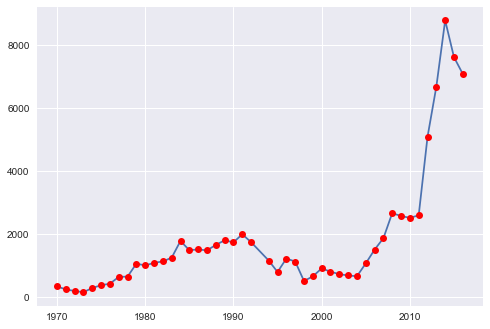

In [199]:
plt.plot(a.index, a['count'], marker = 'o', mfc='r')

In [11]:
data.columns

Index(['count'], dtype='object')

In [12]:
data.index.levels

FrozenList([[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], ['Armed Assault', 'Assassination', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking', 'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown']])

## Plotting coordinates

The next part of the analysis dealt with using coordinates to show high levels of terrorist activity

## Plotting Terrorist attack through countries

In [43]:
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import matplotlib.pyplot as plt
def plot_terrorism(data, country, llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat, lat_0, lon_0):
    country_data = data.loc[data['country_txt'] == country]
    f, ax = plt.subplots(1,1, figsize=(16,9))
    m = Basemap(llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat, lat_0, lon_0) 
    plt.scatter(country_data['longitude'], country_data['latitude'], s = 15)
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    parallels = np.arange(0.,90,10.);
    m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10);
    meridians = np.arange(180.,360.,10.);
    m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=20);
    ny = uscoordinates.shape[0]; nx = uscoordinates.shape[1]
    lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
    x, y = m(lons, lats) # compute map proj coordinates.
    plt.title('Terrorist Attacks in ' + country)
    


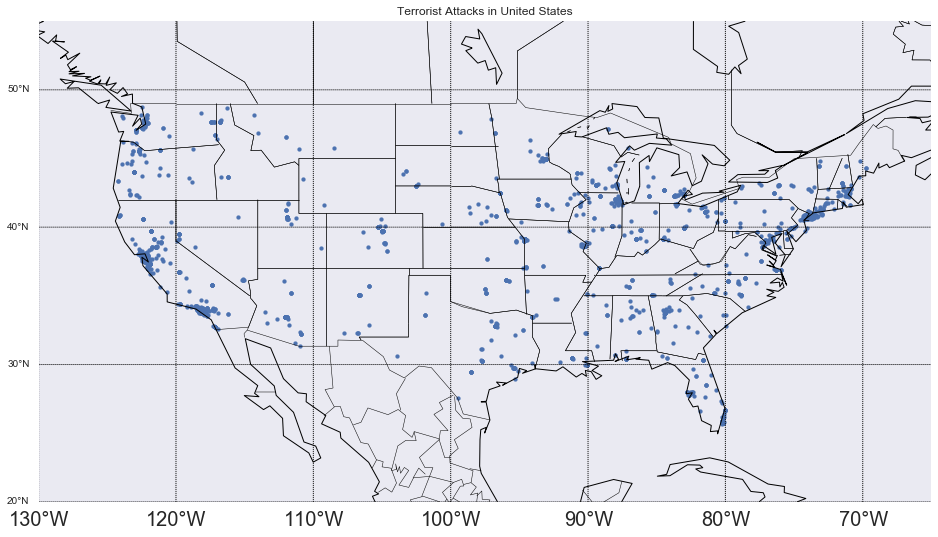

In [44]:
plot_terrorism(raw, 'United States', llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-65, urcrnrlat=55, lat_0 = 39, lon_0=98.5)

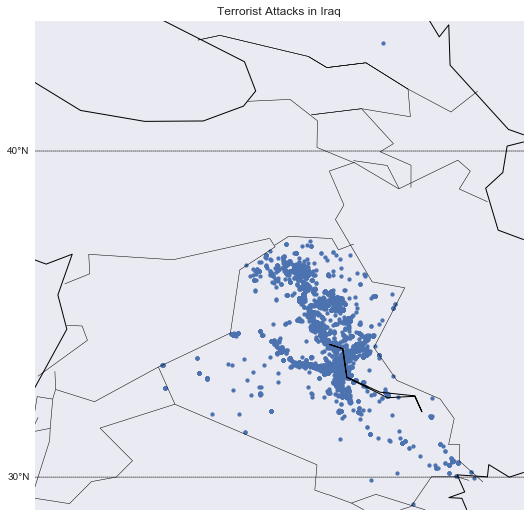

In [45]:
plot_terrorism(raw, 'Iraq', llcrnrlon=35, llcrnrlat=29, urcrnrlon=50, urcrnrlat=44, lat_0 = 33.2232, lon_0=43.6793)

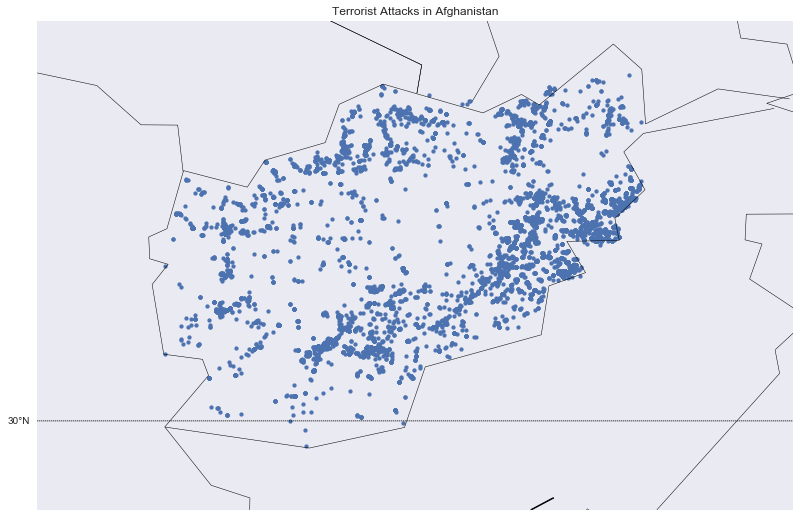

In [46]:
plot_terrorism(raw, 'Afghanistan', llcrnrlon=58, llcrnrlat=28, urcrnrlon=75, urcrnrlat=39, lat_0 = 33.9391, lon_0=67.7100)

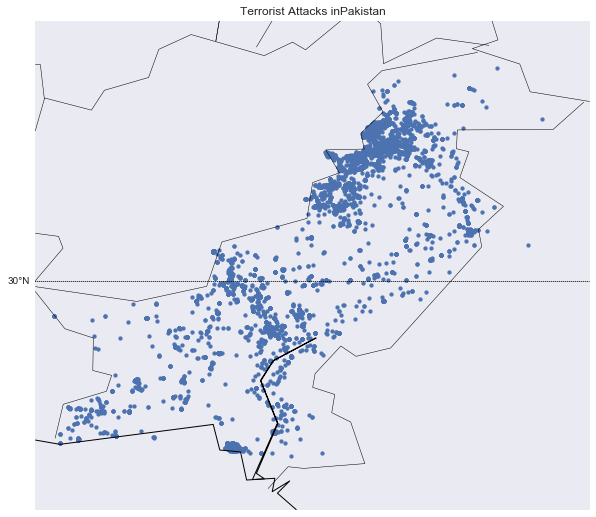

In [42]:
plot_terrorism(raw, 'Pakistan', llcrnrlon=61, llcrnrlat=23, urcrnrlon=78, urcrnrlat=38, lat_0 = 30.3753, lon_0=69.3451)